

# 主成分分析
主成分分析（Principal Component Analysis，PCA）是一种多变量统计方法，它是最常用的降维方法之一。


通过正交变换，将一组可能存在相关性的变量数据转换为一组线性不相关的变量，转换后的变量被称为主成分。

# 直观理解
用于降维，如将二维数据将到一维。
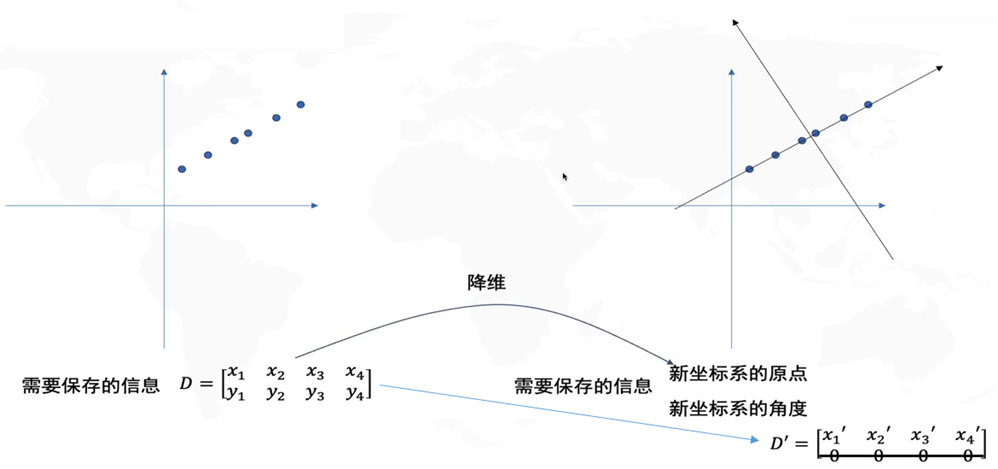

# 相关性

均值：
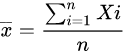

方差：
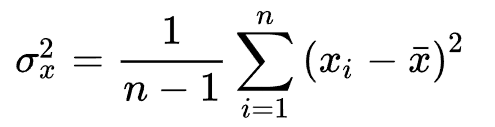

协方差：  
是用来刻画两个随机变量X、Y的线性关系
- 协方差>0，说明两者是正相关，X、Y同向变化
- 协方差<0，说明两者是负相关，X、Y反向变化
- 协方差=0，两者不线性相关（不能完全说明两者不相关）

协方差定义：
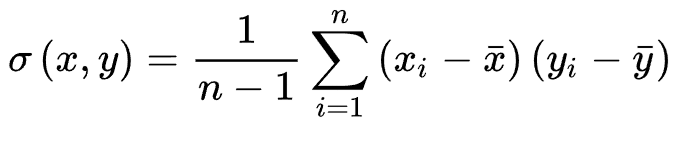
 $\overline{x}、\overline{y}$分别表示两个随机变量所对应的观测样本均值
 
相关性图解：
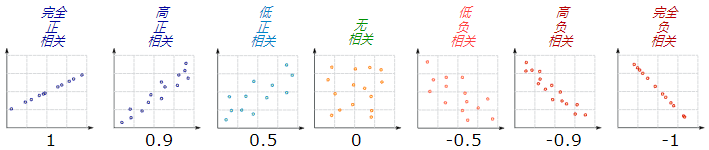

均值： 


# 先从协方差说起

协方差$$cov(X,Y)=\frac{\sum_{i=1}^n{(X_i-\bar{X})(Y_i-\bar{Y})}}{n-1}$$

协方差其意义：
度量各个维度偏离其均值的程度。协方差的值如果为正值，则说明两者是正相关的(从协方差可以引出“相关系数”的定义)，结果为负值就说明负相关的，如果为0，也是就是统计上说的“相互独立”。



协方差矩阵：
二维向量：  
$$C = \begin{pmatrix}
    cov(x,x) &cov(x,y)    \\
     cov(y,x)  & cov(y,y)  \\
\end{pmatrix}\qquad$$  

三维向量： 
$$C = \begin{pmatrix}
    cov(x,x) &cov(x,y)  & cov(x,z) \\
   cov(y,x)  & cov(y,y) &  cov(y,z) \\
   cov(z,x)  & cov(z,y) &cov(z,z)   \\
\end{pmatrix}\qquad$$  
从协方差矩阵上，可以得到变量之间两两的相关性

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#设置一下np的输出格式
np.set_printoptions(threshold=100,precision= 4,suppress=True)
size = 15

## 示例数据

In [2]:
# 计算以下数据的协方差矩阵
np.random.seed(0)
# 随机生成一个实数，范围1-10，生成10行数据，每行2个数据
data = np.random.uniform(1,10,(10,2))
data[:,1:] = 0.5*data[:,0:1]+np.random.uniform(-2,2,(10,1))
data

array([[5.9393, 4.8841],
       [6.4249, 4.4091],
       [4.8129, 2.2524],
       [4.9383, 3.5913],
       [9.673 , 3.3096],
       [8.1255, 4.6224],
       [6.1124, 1.6296],
       [1.6393, 2.5983],
       [1.182 , 0.6784],
       [8.0034, 3.6604]])

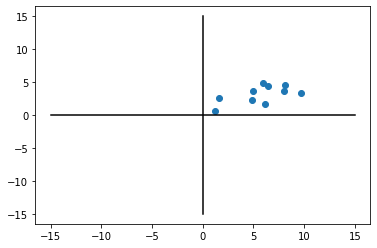

In [3]:
# 可视化数据
plt.scatter(data[:,0],data[:,1])
plt.plot([-size,size],[0,0],c='black')
plt.plot([0,0],[-size,size],c='black')

去中心化

$x_{mormal}=x_i-\overline{x}$

In [21]:
# 去中心化的数据
data_norm = data-data.mean(axis = 0)
data,data.mean(axis = 0),data_norm

(array([[5.9393, 4.8841],
        [6.4249, 4.4091],
        [4.8129, 2.2524],
        [4.9383, 3.5913],
        [9.673 , 3.3096],
        [8.1255, 4.6224],
        [6.1124, 1.6296],
        [1.6393, 2.5983],
        [1.182 , 0.6784],
        [8.0034, 3.6604]]),
 array([5.6851, 3.1636]),
 array([[ 0.2542,  1.7206],
        [ 0.7398,  1.2455],
        [-0.8722, -0.9112],
        [-0.7468,  0.4277],
        [ 3.9879,  0.146 ],
        [ 2.4404,  1.4589],
        [ 0.4273, -1.5339],
        [-4.0458, -0.5652],
        [-4.5031, -2.4852],
        [ 2.3183,  0.4968]]))

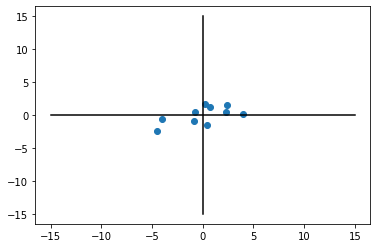

In [5]:
# 可视化
plt.scatter(data_norm[:,0],data_norm[:,1])
plt.plot([-size,size],[0,0],c='black')
plt.plot([0,0],[-size,size],c='black')

In [6]:
X = data_norm[:,0]
Y = data_norm[:,1]
X,Y

(array([ 0.2542,  0.7398, -0.8722, -0.7468,  3.9879,  2.4404,  0.4273,
        -4.0458, -4.5031,  2.3183]),
 array([ 1.7206,  1.2455, -0.9112,  0.4277,  0.146 ,  1.4589, -1.5339,
        -0.5652, -2.4852,  0.4968]))

In [7]:
# 定义一个函数，输入X，Y能得到X，Y之间的协方差
def getcov(X,Y):
    covxy = ((X-X.mean())*(Y-Y.mean())).sum()/(len(X)-1)
    return covxy

In [8]:
getcov(X,X)

7.332530886964573


numpy 自带了协方差矩阵的计算方法

In [9]:
C = np.cov(data_norm.T)
C

array([[7.3325, 2.2168],
       [2.2168, 1.8633]])

# 计算协方差矩阵的特征向量和特征值

由矩阵特征值特征向量的定义：
$$Cv=\lambda v$$
其中，$λ$是特征向量$v$对应的特征值，一个矩阵的一组特征向量是一组【正交向量】。

特征值分解矩阵：

对于矩阵$C$，有一组特征向量$V$，将这组向量进行正交化单位化，就能得到一组正交单位向量。特征值分解，就是将矩阵$C$分解为如下式：

$$CQ=\lambda Q$$
$$C=Q\Sigma Q^{-1}$$

其中，$Q$是矩阵$C$的特征向量组成的矩阵，$\Sigma$则是一个对角阵，对角线上的元素就是特征值。

In [10]:
#计算 协方差矩阵：
# 特征值 和 特征向量
vals, vecs = np.linalg.eig(C)
# vals 特征值
# vecs 特征向量
vals,vecs

(array([8.1182, 1.0777]),
 array([[ 0.9426, -0.334 ],
        [ 0.334 ,  0.9426]]))

In [11]:
#重新排序，从大到小
vecs = vecs[:,np.argsort(-vals)]
vals = vals[np.argsort(-vals)]
vals,vecs

(array([8.1182, 1.0777]),
 array([[ 0.9426, -0.334 ],
        [ 0.334 ,  0.9426]]))

In [12]:
#第一个特征值对应的特征向量
vals[0],vecs[:,0]

(8.118170385604763, array([0.9426, 0.334 ]))

In [13]:
#第二个特征值对应的特征向量
vals[1],vecs[:,1]

(1.0776889576956004, array([-0.334 ,  0.9426]))

这时候，相当于已经在数据中定义了"两个轴"，第一个轴的方向是第一个特征向量$v_1$，第二个轴的方向是第二个特征向量$v_2$


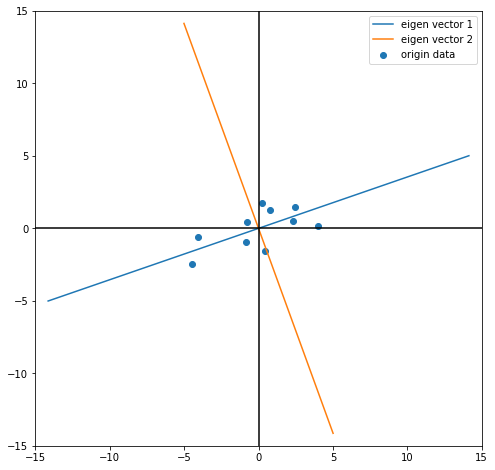

In [14]:
import matplotlib.pyplot as plt
#设置图大小
size = 15

plt.figure(1,(8,8))

plt.scatter(data_norm[:,0],data_norm[:,1],label='origin data')

i=0
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

i=1
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))


#画一下x轴y轴
plt.plot([-size,size],[0,0],c='black')
plt.plot([0,0],[-size,size],c='black')
plt.xlim(-size,size)
plt.ylim(-size,size)
plt.legend()
plt.show()

如果用PCA把$m$个维度的数据降维成$k$个维度，即只用前$k$个主成分来表示，那么数据在主成分上的投影坐标是
$$Y_{n*k} = X_{n*m}Q_{m*k}$$
$Q$为特征向量组成的矩阵

In [15]:
vecs

array([[ 0.9426, -0.334 ],
       [ 0.334 ,  0.9426]])

In [16]:
# 数据在主成分1上的投影坐标是Y
k=1
# 取0-K个
Q = vecs[:,:k]

Y = np.matmul(data_norm,Q)
Q,Y

(array([[0.9426],
        [0.334 ]]),
 array([[ 0.8144],
        [ 1.1133],
        [-1.1265],
        [-0.561 ],
        [ 3.8076],
        [ 2.7876],
        [-0.1097],
        [-4.0022],
        [-5.0746],
        [ 2.3511]]))

$$Y_{10x1}=   X_{10x2} x Q_{2x1}$$

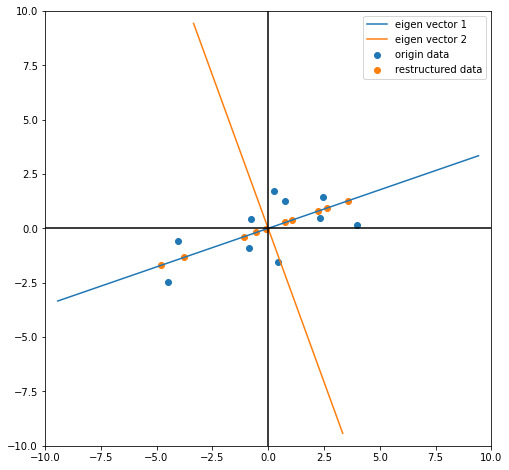

In [17]:
# 结果

import matplotlib.pyplot as plt
#设置图大小
size = 10

plt.figure(1,(8,8))

plt.scatter(data_norm[:,0],data_norm[:,1],label='origin data')

i=0
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

i=1
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))


data_ = np.matmul(Y,Q.T)
plt.scatter(data_[:,0],data_[:,1],label='restructured data')

#画一下x轴y轴
plt.plot([-size,size],[0,0],c='black')
plt.plot([0,0],[-size,size],c='black')
plt.xlim(-size,size)
plt.ylim(-size,size)
plt.legend()
plt.show()

# 数据还原
这个时候我们相当于只需要存储**前k个主成分的特征向量$Q_{m*k}$**和**数据在前k个主成分上的投影坐标$Y_{n*k}$**，就可以还原数据
$$Y_{n*k}{Q_{m*k}}^T=X_{n*m}$$
其中，由于$Q$已经正交化，${Q_{m*k}}^T{Q_{m*k}}=I_{k*k}$

In [18]:
#得到去中心化的sh
np.matmul(Y,Q.T)

array([[ 0.7676,  0.272 ],
       [ 1.0494,  0.3719],
       [-1.0618, -0.3763],
       [-0.5288, -0.1874],
       [ 3.5888,  1.2719],
       [ 2.6275,  0.9312],
       [-0.1034, -0.0366],
       [-3.7723, -1.3369],
       [-4.7831, -1.6952],
       [ 2.216 ,  0.7854]])

In [19]:
#加上均值，还原数据
data_ = np.matmul(Y,Q.T)+data.mean(0)
data_

array([[6.4527, 3.4356],
       [6.7345, 3.5355],
       [4.6233, 2.7873],
       [5.1563, 2.9761],
       [9.2739, 4.4355],
       [8.3125, 4.0947],
       [5.5817, 3.1269],
       [1.9128, 1.8266],
       [0.902 , 1.4684],
       [7.9011, 3.9489]])

孙武于 2021年10月27日 20:00:10 编辑